In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 240)

In [2]:
df = pd.read_csv('train.csv', index_col = 'qid')

In [43]:
sincere = df.target == 0
df0 = df[sincere]
df1 = df[sincere == False]
df1_train, df1_test = train_test_split(df1, test_size=0.2)
df0_train, df0_test = train_test_split(df0, test_size=0.2)

In [45]:
dtrain = pd.concat([df0_train.sample(df1_train.shape[0]), df1_train])
dtest = pd.concat([df0_test, df1_test])
X_train, X_test, y_train, y_test = dtrain.question_text, dtest.question_text, dtrain.target, dtest.target

In [18]:
from sklearn.model_selection import train_test_split
X, Y = dfds.question_text, dfds.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [53]:
# Create a CountVectorizer, fit to the corpus, and
# transform the training and testing questions
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', ngram_range=(1,2), binary=True)
cv.fit(X_train)
X_train, X_test = cv.transform(X_train), cv.transform(X_test)

In [54]:
# Fit a logistic regression model and find
# its roc statistics and auc score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_c = LogisticRegression()
lr_c.fit(X_train, y_train)
y_pred = lr_c.predict(X_test)
lr_c_scores = lr_c.predict_proba(X_test)
roc = metrics.roc_curve(y_test, lr_c_scores[:,1])
auc = metrics.roc_auc_score(y_test, lr_c_scores[:,1])

In [55]:
import matplotlib.pyplot as plt

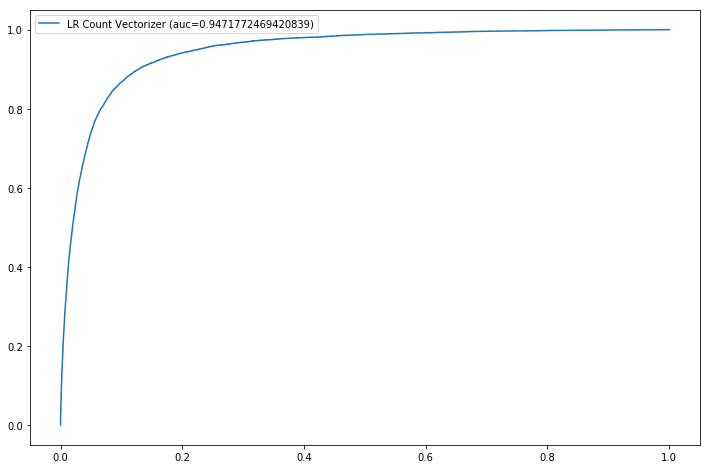

In [56]:
# Plot the ROC curve
fp, tp = roc[0], roc[1]
plt.figure(figsize=(12,8))
plt.plot(fp, tp, label='LR Count Vectorizer (auc={})'.format(auc))
plt.legend()

In [57]:
# Now we want to confirm that the F1 score given by sklearn's 
# f1_score function corresponds to a threshold of 0.5
# First find the f score
f = metrics.f1_score(y_test, y_pred)
print("F score: {}".format(f))

F score: 0.5161980665633533


In [58]:
# Now find precision and recall, and the f score given by
# every combination of the two
pr, re, th = metrics.precision_recall_curve(y_test, lr_c_scores[:,1])
pr, re, th = pr[:-2], re[:-2], th[:-1]
fs = 2*np.divide(np.multiply(pr, re), np.add(pr, re))

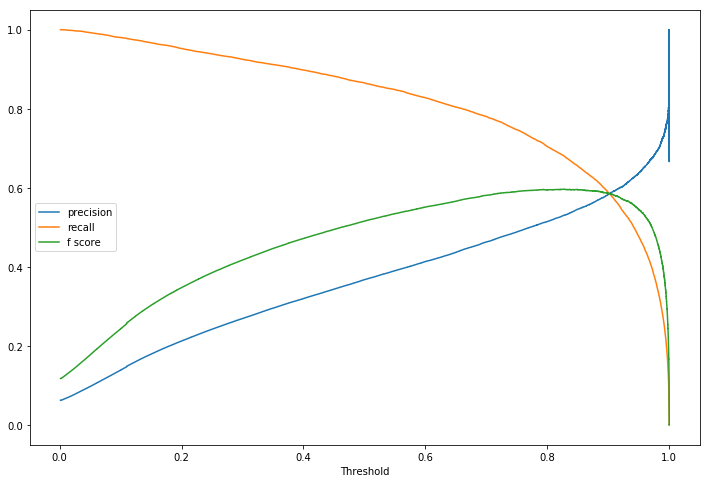

In [59]:
plt.figure(figsize=(12,8))
plt.plot(th, pr, label = 'precision')
plt.plot(th, re, label = 'recall')
plt.plot(th, fs, label = 'f score')
plt.xlabel('Threshold')
plt.legend()

In [60]:
opt_thr = th[np.argmax(fs)]

In [61]:
y_pred = lr_c_scores[:,1] > opt_thr

In [32]:
cfm = metrics.confusion_matrix(y_test, y_pred)

In [33]:
cfm

array([[17543,  2844],
       [ 1849, 18169]])